In [1]:
import sqlalchemy
from sqlalchemy import create_engine, MetaData, inspect
from sqlalchemy import Column, Float, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
Base = declarative_base()

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [3]:
conn = engine.connect()

In [4]:
Base = automap_base()

In [5]:
Base.prepare(engine, reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement


In [8]:
# Assign the station class to a variable called `station`
Station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

measurement_id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

station_id INTEGER
station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
import datetime as dt

In [14]:
# Latest Date, this is my vacation end date
#latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date = session.query(Measurement.date).\
filter(Measurement.station == 'USC00511918').\
order_by(Measurement.date.desc()).first()
print(latest_date)

('2015-10-30',)


In [15]:
#Date 12 months ago
y = int(latest_date[0][:4])
m = int(latest_date[0][5:7])
d = int(latest_date[0][8:10])
print(y)
print(m)
print(d)
start_date = dt.date(y, m, d) - dt.timedelta(days = 365)
print(start_date)

2015
10
30
2014-10-30


In [16]:
# Test to query measurements table 
for row in session.query(Measurement.date, Measurement.prcp).limit(5).all():
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-07', 0.06)


In [17]:
session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date).all()

[('2014-10-30', 0.05),
 ('2014-10-31', 0.02),
 ('2014-11-01', 0.04),
 ('2014-11-02', 0.0),
 ('2014-11-03', 0.0),
 ('2014-11-04', 0.0),
 ('2014-11-05', 0.14),
 ('2014-11-06', 0.1),
 ('2014-11-07', 0.0),
 ('2014-11-08', 0.09),
 ('2014-11-09', 0.0),
 ('2014-11-10', 0.0),
 ('2014-11-11', 0.0),
 ('2014-11-12', 0.05),
 ('2014-11-13', 0.0),
 ('2014-11-14', 0.0),
 ('2014-11-15', 0.62),
 ('2014-11-16', 0.01),
 ('2014-11-17', 0.0),
 ('2014-11-18', 0.0),
 ('2014-11-19', 0.0),
 ('2014-11-20', 0.08),
 ('2014-11-21', 0.0),
 ('2014-11-22', 0.0),
 ('2014-11-23', 0.0),
 ('2014-11-24', 0.04),
 ('2014-11-25', 0.0),
 ('2014-11-26', 0.0),
 ('2014-11-27', 0.0),
 ('2014-11-28', 0.0),
 ('2014-11-29', 0.0),
 ('2014-11-30', 0.01),
 ('2014-12-01', 0.0),
 ('2014-12-02', 0.02),
 ('2014-12-03', 0.15),
 ('2014-12-04', 0.09),
 ('2014-12-05', 0.0),
 ('2014-12-06', 0.0),
 ('2014-12-07', 0.0),
 ('2014-12-08', 0.0),
 ('2014-12-09', 0.0),
 ('2014-12-10', 0.0),
 ('2014-12-11', 0.05),
 ('2014-12-12', 0.01),
 ('2014-12-13', 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
tups = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= start_date).all()
    

columns = ['date', 'prcp']
measurements_df = pd.DataFrame([x for x in tups], columns=columns)

measurements_df = measurements_df.set_index('date')
measurements_df.head(10)


,prcp
date,
2014-10-30,0.05
2014-10-31,0.02
2014-11-01,0.04
2014-11-02,0.00
2014-11-03,0.00
2014-11-04,0.00
2014-11-05,0.14
2014-11-06,0.10
2014-11-07,0.00


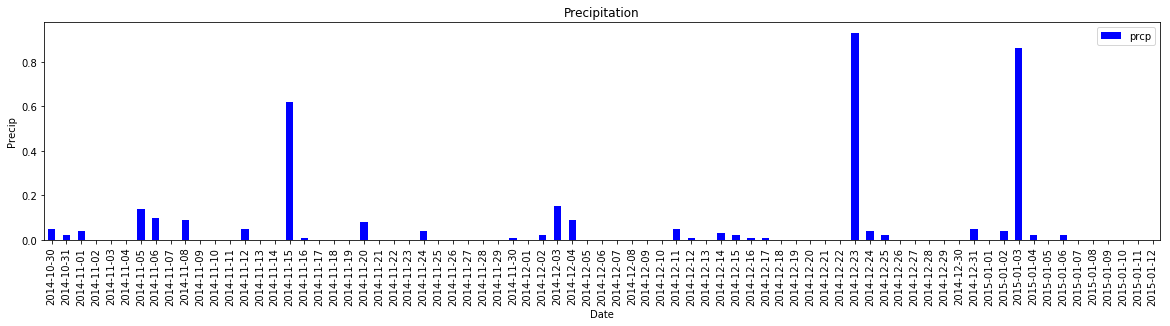

In [20]:
measurements_df = measurements_df.reset_index()

#For clarity plotting only 75 rows in the data frame
new_df = measurements_df.head(75)
new_df.plot.bar(x='date', y='prcp', color=['blue'],
                                 align='center', figsize=(20, 4))


plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Precip")
plt.savefig(os.path.join('precipitation.png'))

plt.show()

In [21]:
#print(measurements_df['prcp'].describe())

print(measurements_df['prcp'].describe())


count    5923.000000
mean        0.182352
std         0.478900
min         0.000000
25%         0.000000
50%         0.020000
75%         0.140000
max         9.640000
Name: prcp, dtype: float64


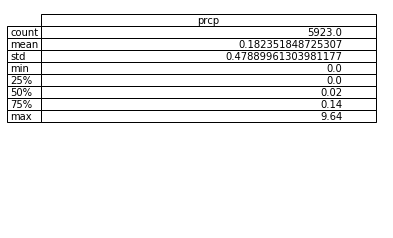

In [22]:
#create a subplot without frame
from pandas.plotting import table

desc = measurements_df['prcp'].describe()
plot = plt.subplot(111, frame_on=False)

#remove axis
plot.xaxis.set_visible(False) 
plot.yaxis.set_visible(False) 

#create the table plot and position it in the upper left corner
table(plot, desc,loc='upper right')

#save the plot as a png file
plt.savefig('precip_stats.png')

In [23]:
#Query to calculate the total number of stations
session.query(Station).count()

9

In [24]:
#print(session.query(Measurement.station).group_by(Measurement.station).all())
from sqlalchemy import func
from sqlalchemy import desc

session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(desc(func.count(Measurement.station)) ).all()


[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [25]:
  
#Both queries below give the same output
engine.execute('SELECT station, COUNT(station) FROM measurement GROUP BY station ORDER BY station DESC').first()
# OR 
session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(desc(func.count(Measurement.station)) ).first()

('USC00519281', 2772)

In [26]:
# date 1 year ago from today
year_ago = dt.date.today() - dt.timedelta(days=365)
print(year_ago)

2017-04-24


In [27]:
tups = session.query(Measurement.tobs).\
    filter(Measurement.date >= year_ago).all()
    
columns = ['tobs']
tobs_df = pd.DataFrame([x for x in tups], columns=columns)

tobs_df = tobs_df.set_index('tobs')
tobs_df.head(10)

""
tobs
77.0
77.0
77.0
78.0
76.0
72.0
63.0
75.0
78.0


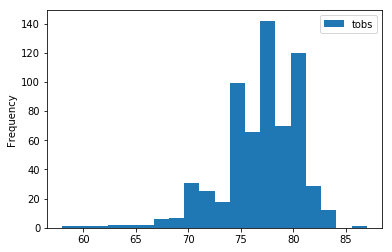

In [28]:
tobs_df = tobs_df.reset_index()

#For clarity plotting only 75 rows in the data frame
#new_tobs_df = tobs_df.head(75)
#new_tobs_df.plot.bar(x='date', y='tobs', color=['green'],
#                                 align='center', figsize=(20, 4))


#plt.title("TOBS")
#plt.xlabel("Date")
#plt.ylabel("Tobs")
#plt.savefig(os.path.join('temp_hist.png'))

#plt.show()
df = pd.DataFrame(tobs_df)
df.plot.hist(bins=20)
plt.show()

In [29]:
#Write a function called calc_temps 
def calc_temps(d1, d2):
#    sel = [Measurement.date,
#           func.avg(Measurement.tobs), 
#           func.min(Measurement.tobs), 
#           func.avg(Measurement.tobs)] 
       
#    calc_summary = session.query(*sel).\
#        filter(func.strftime(Measurement.date)>= d1).\
#        filter(func.strftime(Measurement.date)<= d2).\
#        group_by(Measurement.date).\
#        order_by(Measurement.date).all()
        
     sel = [func.avg(Measurement.tobs), 
           func.min(Measurement.tobs), 
           func.max(Measurement.tobs)] 
       
     calc_summary = session.query(*sel).\
         filter(func.strftime(Measurement.date)>= d1).\
         filter(func.strftime(Measurement.date)<= d2).all()
         #group_by(Measurement.date).\
         #order_by(Measurement.date).all()

     return calc_summary

#calling the function
calc_temps('2017-01-01', '2017-01-15')

[(68.20253164556962, 60.0, 78.0)]

In [30]:
#Write a function called calc_temps 
def calc_tempsOnlyOneDate(d1):
#    sel = [Measurement.date,
#           func.avg(Measurement.tobs), 
#           func.min(Measurement.tobs), 
#           func.avg(Measurement.tobs)] 
       
#    calc_summary = session.query(*sel).\
#        filter(func.strftime(Measurement.date)>= d1).\
#        filter(func.strftime(Measurement.date)<= d2).\
#        group_by(Measurement.date).\
#        order_by(Measurement.date).all()
        
     sel = [func.avg(Measurement.tobs), 
           func.min(Measurement.tobs), 
           func.max(Measurement.tobs)] 
       
     calcone_summary = session.query(*sel).\
         filter(func.strftime(Measurement.date)>= d1).all()
         #group_by(Measurement.date).\
         #order_by(Measurement.date).all()

     return calcone_summary

#calling the function
calc_tempsOnlyOneDate('2017-01-01')

[(74.02052091554854, 58.0, 87.0)]

In [31]:
#@climate_analysis_app.route("/api/v1.0/startend")
#def tempstartend():
   
results = calc_temps('2017-01-01', '2017-01-15')
print("Hello")
print(results)
#all_tempstartend = list(np.ravel(results))

#tempstartend()    #return jsonify(all_tempstartend)


Hello
[(68.20253164556962, 60.0, 78.0)]


In [32]:
from flask import Flask, jsonify
import numpy as np

In [33]:
climate_analysis_app = Flask(__name__)

In [34]:
@climate_analysis_app.route("/")
def welcome():
    print("Climate Analaysis Home Page")
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/startend<br/>"
        f"/api/v1.0/start"
    )


@climate_analysis_app.route("/api/v1.0/precipitation")
def precipitation():
    #results = session.query(Measurement).all()
    results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago).all()

    # Create a dictionary from the row data and append to a list of all_passengers
    all_measurement = []
    for measurement in results:
        measurement_dict = {}
        measurement_dict["date"] = measurement.date
        measurement_dict["prcp"] = measurement.prcp
        
        all_measurement.append(measurement_dict)

    return jsonify(all_measurement)

@climate_analysis_app.route("/api/v1.0/stations")
def stationnames():
    """Return a list of all passenger names"""
    # Query all Stations
    results = session.query(Station.name).all()

    # Convert list of tuples into normal list
    all_names = list(np.ravel(results))

    return jsonify(all_names)

@climate_analysis_app.route("/api/v1.0/tobs")
def tempobservations():
    """Return a list of all passenger names"""
    # Query all Stations
    results = session.query(Measurement.tobs).\
    filter(Measurement.date >= year_ago).all()

    # Convert list of tuples into normal list
    all_tobs = list(np.ravel(results))

    return jsonify(all_tobs)



@climate_analysis_app.route("/api/v1.0/startend")
def tempstartend():
   
   results = calc_temps('2017-01-01', '2017-01-15')
   #print(results)
   all_tempstartend = list(np.ravel(results))

   return jsonify(all_tempstartend)


@climate_analysis_app.route("/api/v1.0/start")
def tempstart():
   
   results = calc_tempsOnlyOneDate('2017-01-01')
   #print(results)
   all_tempstart = list(np.ravel(results))

   return jsonify(all_tempstart)
   
if __name__ == '__main__':
    climate_analysis_app.run(debug=False)
    

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [24/Apr/2018 12:28:43] "GET / HTTP/1.1" 200 -


Climate Analaysis Home Page


127.0.0.1 - - [24/Apr/2018 12:28:50] "GET /api/v1.0/precipitation HTTP/1.1" 200 -
127.0.0.1 - - [24/Apr/2018 12:29:01] "GET /api/v1.0/startend HTTP/1.1" 200 -
127.0.0.1 - - [24/Apr/2018 12:29:08] "GET /api/v1.0/start HTTP/1.1" 200 -
